In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('data/zomato.csv')

In [42]:
data.sample(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4287,https://www.zomato.com/bangalore/mast-kalandar...,"GMR Complex, Ground Floor, Opposite Bangalore ...",Mast Kalandar,No,No,2.1/5,337,080 40901100,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450,"[('Rated 2.0', 'RATED\n Food was kind of OK ,...",[],Delivery,Bellandur
51618,https://www.zomato.com/bangalore/milkyway-ice-...,"Shop K-04, 1st Floor, Ascendas Park Square Mal...",Milkyway Ice Creams & Fast Food,Yes,No,3.7 /5,24,+91 9880015540,"ITPL Main Road, Whitefield",Quick Bites,NaN,"Fast Food, Ice Cream, Beverages",200,"[('Rated 4.0', 'RATED\n Buy 2 get 1 freeee......","['Black Forest Fantasy', 'Black Forest Dream W...",Dine-out,Whitefield
6052,https://www.zomato.com/bangalore/farzi-cafe-la...,"202, Level 2, UB City, Vittal Mallya Road, Lav...",Farzi Cafe,No,No,4.4/5,2392,+91 7259400900\r\r\n+91 7259600900,Lavelle Road,"Casual Dining, Microbrewery","Appletini, Lamb Tacos, Cocktails, Martini, Sto...",Modern Indian,"1,500","[('Rated 4.0', 'RATED\n Cute place to hangout...",[],Dine-out,Brigade Road


In [43]:
data.drop(['url','address','location','phone','reviews_list','menu_item'],axis=1,inplace=True)

removed unnecessary columns which we don't need for analysis

In [44]:
data.shape

(51717, 11)

In [45]:
data.rename(columns={'approx_cost(for two people)':'approx_cost_for_two','listed_in(type)':'type','listed_in(city)':'city'},inplace= True)

renamed column names for better understanding of columns name

In [46]:
data.drop_duplicates(inplace = True)

droped all the duplicates from the dateframe

In [47]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [48]:
data['rate'].replace({'NEW':'0.0/5','-':'0.0/5'},inplace = True)
data['rate'].fillna('0.0/5',inplace=True)

C:\Users\Pranil\AppData\Local\Temp\ipykernel_20492\1397646737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate'].replace({'NEW':'0.0/5','-':'0.0/5'},inplace = True)


cleaning rating column by replacing text data and nan values into int(0.0/5) 

In [49]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0.0/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [50]:
data['rate'] = data['rate'].apply(lambda x : float(x.split('/')[0].strip()))

In [51]:
#removing data after "/"  that is from "0.0/5" to "0.0"...

In [52]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [57]:
data['rate'].mean()

np.float64(2.98274765956622)

In [58]:
data['rate'].loc[data['rate']==0.0,]=2.3

C:\Users\Pranil\AppData\Local\Temp\ipykernel_20492\2278536139.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['rate'].loc[data['rate']==0.0,]=2.3
C:\Users\Pranil\AppData\Local\Temp\ipykernel_20492\2278536139.py:1: SettingWithCopyWar

In [59]:
#replacing "0.0" with mean of the column..

In [60]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       4.8, 4.9, 2.1, 2. , 1.8])

In [61]:
data.isnull().sum()

name                       0
online_order               0
book_table                 0
rate                       0
votes                      0
rest_type                227
dish_liked             27998
cuisines                  45
approx_cost_for_two      344
type                       0
city                       0
dtype: int64

In [62]:
data.shape

(51593, 11)

In [63]:
df1 = data[data.isna().any(axis=1)]
df1.sample(10)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_two,type,city
23726,Shree Udupi Grand,Yes,No,3.5,19,Casual Dining,NaN,"South Indian, Chinese, North Indian",400,Dine-out,JP Nagar
48496,Bettaiah Military Hotel,No,No,3.3,4,Quick Bites,NaN,South Indian,250,Dine-out,Residency Road
43762,Cafe Monarch Luxur,No,No,3.8,23,Casual Dining,NaN,"North Indian, South Indian, Chinese, Fast Food",800,Dine-out,MG Road
7284,Best Biryani,No,No,2.3,0,Quick Bites,NaN,"North Indian, Biryani, Desserts",600,Delivery,Brookefield
48993,New Cool Joint,Yes,No,3.6,25,Quick Bites,NaN,"Fast Food, Beverages, Ice Cream, Juices, Sandwich",150,Delivery,Sarjapur Road
42081,Reddy's Paradise,Yes,No,3.3,5,Casual Dining,NaN,Andhra,700,Dine-out,Marathahalli
1374,Biryani Nights,Yes,No,3.6,19,Quick Bites,NaN,"South Indian, North Indian, Chinese",400,Delivery,Bannerghatta Road
23550,Loca Moca - The Indian Grub,No,No,3.4,4,"Food Court, Casual Dining",NaN,"North Indian, Biryani",600,Dine-out,JP Nagar
36209,Cafe Hush,No,No,3.6,22,Cafe,NaN,"Cafe, Fast Food",500,Delivery,Koramangala 7th Block
36525,Yeti,No,No,3.7,22,"Quick Bites, Dessert Parlor",NaN,"Fast Food, Desserts, Ice Cream",300,Desserts,Koramangala 7th Block


In [64]:
data['dish_liked']


0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51593, dtype: object

In [65]:
# Step 1: Split each string into a list, strip whitespace
d = data.loc[(data['dish_liked'].notnull())&(data['rate']==2.3),'dish_liked']
d = d.apply(lambda x: [dish.strip() for dish in x.split(',')])
d


1011                                     [Chicken Biryani]
1647           [Coffee, Masala Dosa, Curd Rice, Idli Vada]
2048           [Coffee, Masala Dosa, Curd Rice, Idli Vada]
2239     [Beer, Cocktails, Pizza, Peri Chicken, Belgian...
2240     [Wheat Beer, Lager, Paneer Lollipop, Rustica P...
                               ...                        
50050    [Chaat, Tea, Sev Puri, Chai, Raj Kachori, Coff...
50054    [Paneer Biryani, Vegetable Biryani, Chicken Bo...
50135             [Hyderabadi Biryani, Rumali Roti, Raita]
50571                                       [Mutton Curry]
51386                                       [Mutton Curry]
Name: dish_liked, Length: 221, dtype: object

In [66]:
# Step 2: Flatten the entire column into a single list
all_dishes = sum(d, [])

all_dishes

['Chicken Biryani',
 'Coffee',
 'Masala Dosa',
 'Curd Rice',
 'Idli Vada',
 'Coffee',
 'Masala Dosa',
 'Curd Rice',
 'Idli Vada',
 'Beer',
 'Cocktails',
 'Pizza',
 'Peri Chicken',
 'Belgian Wit',
 'Neer Dosa',
 'Cheese Balls',
 'Wheat Beer',
 'Lager',
 'Paneer Lollipop',
 'Rustica Pizza',
 'Dark Beer',
 'Mocktails',
 'Cocktails',
 'Chicken Biryani',
 'Soba Noodles',
 'Pad Thai Noodle',
 'Chicken Sandwich',
 'Raita',
 'Thali',
 'Paratha',
 'Chole',
 'Buttermilk',
 'Paneer Bhurji',
 'Rice',
 'Wheat Beer',
 'Lager',
 'Paneer Lollipop',
 'Rustica Pizza',
 'Dark Beer',
 'Mocktails',
 'Cocktails',
 'Beer',
 'Cocktails',
 'Pizza',
 'Peri Chicken',
 'Belgian Wit',
 'Neer Dosa',
 'Cheese Balls',
 'Aam Panna',
 'Pasta',
 'Paneer Tikka',
 'Biryani',
 'Pav Bhaji',
 'Veg Pulao',
 'Nachos',
 'Pizza',
 'Momos',
 'Brownie',
 'Pasta',
 'Nachos',
 'Waffles',
 'Onion Rings',
 'Pizza',
 'Momos',
 'Brownie',
 'Pasta',
 'Nachos',
 'Waffles',
 'Onion Rings',
 'Paneer Biryani',
 'Vegetable Biryani',
 'Chicken

In [67]:
from collections import Counter

In [68]:
# Step 3: Count dish frequencies
dish_counts = Counter(all_dishes)

dish_counts

Counter({'Cocktails': 36,
         'Pizza': 34,
         'Chicken Biryani': 23,
         'Coffee': 22,
         'Pasta': 21,
         'Nachos': 21,
         'Fish': 21,
         'Beer': 20,
         'Raita': 20,
         'Thali': 20,
         'Mocktails': 19,
         'Biryani': 19,
         'Vegetable Biryani': 17,
         'Brownie': 16,
         'Beef Nachos': 14,
         'Murgh Ghee Roast': 13,
         'Verdure Pizza': 13,
         'Veg Bao': 12,
         'Spaghetti': 12,
         'Mai Thai': 12,
         'Paratha': 10,
         'Dal Makhani': 10,
         'Gulab Jamun': 10,
         'Curd Rice': 9,
         'Biryani Combo': 9,
         'Buttermilk': 8,
         'Roti': 8,
         'Wheat Beer': 7,
         'Lager': 7,
         'Chole': 7,
         'Paneer Bhurji': 7,
         'Rice': 7,
         'Pav Bhaji': 7,
         'Vada': 7,
         'Tiramisu': 7,
         'Burgers': 7,
         'Paneer Lollipop': 6,
         'Rustica Pizza': 6,
         'Soba Noodles': 6,
         'Pad T

In [69]:
# Step 4: Get top 3 most frequent dishes
top_3_dishes = dish_counts.most_common(3)

print(top_3_dishes)

[('Cocktails', 36), ('Pizza', 34), ('Chicken Biryani', 23)]


In [70]:
data['dish_liked']=data['dish_liked'].fillna('Coffee,Raita,Thali')

In [71]:
data['name'] = data['name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [72]:
data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      shape=(8763,), dtype=object)

In [73]:
for i in data['name']:
    if len(i)>60:
        print(i)

In [74]:
data['rate'].isnull().sum()

np.int64(0)

In [75]:
data.isnull().sum()

name                     0
online_order             0
book_table               0
rate                     0
votes                    0
rest_type              227
dish_liked               0
cuisines                45
approx_cost_for_two    344
type                     0
city                     0
dtype: int64

In [76]:
data['approx_cost_for_two']= data['approx_cost_for_two'].str.replace(',','')

In [77]:
data['approx_cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [78]:
data['approx_cost_for_two']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost_for_two, Length: 51593, dtype: object

In [79]:
data['approx_cost_for_two']=data['approx_cost_for_two'].fillna(0)

data['approx_cost_for_two']=data['approx_cost_for_two'].astype(int)

data['approx_cost_for_two']=data['approx_cost_for_two'].replace(0,551)

data['approx_cost_for_two'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  551,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140])

In [80]:
data.groupby('name').count().head(10)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost_for_two,type,city
name,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#Vibes Restro,3,3,3,3,3,3,3,3,3,3
#refuel,3,3,3,3,3,3,3,3,3,3
'Brahmins' Thatte Idli,1,1,1,1,1,1,1,1,1,1
1 Fahreheit,1,1,1,1,1,1,1,1,1,1
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3
11 to 11 Express Biriyanis,2,2,2,2,2,2,2,2,2,2


In [81]:
data.isnull().sum()

name                     0
online_order             0
book_table               0
rate                     0
votes                    0
rest_type              227
dish_liked               0
cuisines                45
approx_cost_for_two      0
type                     0
city                     0
dtype: int64

filling null values with most repetative values using mode function

In [82]:
mode = data['rest_type'].mode()[0]
data['rest_type']= data['rest_type'].fillna(mode)

mode1 = data['cuisines'].mode()[0]
data['cuisines'] = data['cuisines'].fillna(mode1)

data.isnull().sum()

name                   0
online_order           0
book_table             0
rate                   0
votes                  0
rest_type              0
dish_liked             0
cuisines               0
approx_cost_for_two    0
type                   0
city                   0
dtype: int64

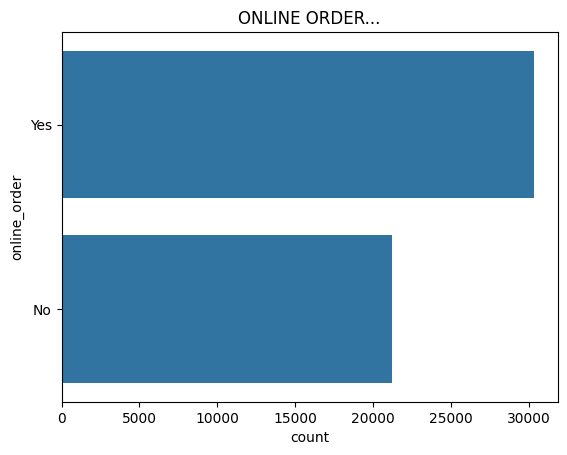

In [83]:
x = data['online_order']
sns.countplot(x)
plt.title('ONLINE ORDER...')
plt.show()

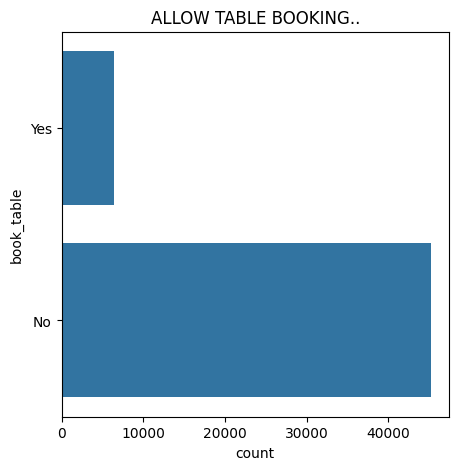

In [84]:
plt.figure(figsize=(5,5))
x = data['book_table']
sns.countplot(x)
plt.title('ALLOW TABLE BOOKING..')
plt.show()

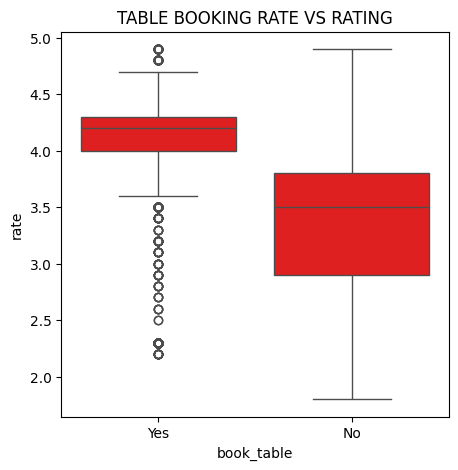

In [85]:
plt.figure(figsize=(5,5))
sns.boxplot(x='book_table',y='rate',data=data,color='red')
plt.title('TABLE BOOKING RATE VS RATING')
plt.show()

In [86]:
df = data[['city','votes']]

In [87]:
df = df.groupby('city')['votes'].sum()
df=df.to_frame()
df=df.sort_values('votes',ascending=False)

In [88]:

display(df.head())

,votes
city,
Koramangala 7th Block,1065880
Koramangala 5th Block,1038043
Koramangala 4th Block,992044
Koramangala 6th Block,978879
BTM,978147


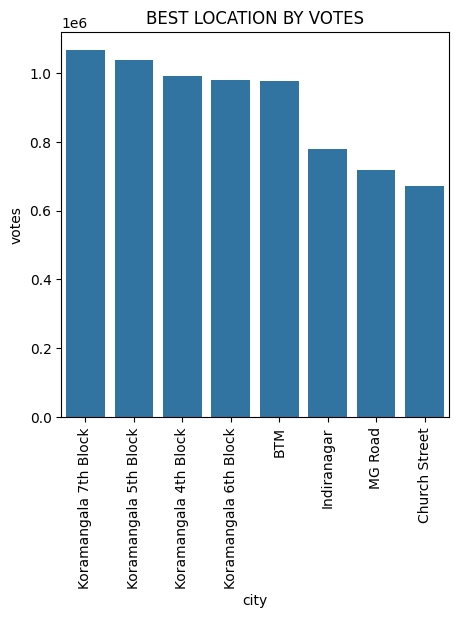

In [89]:
plt.figure(figsize = (5,5))
sns.barplot(x=df.index[:8],y=df['votes'][:8])
plt.xticks(rotation = 90)
plt.title('BEST LOCATION BY VOTES')
plt.show()

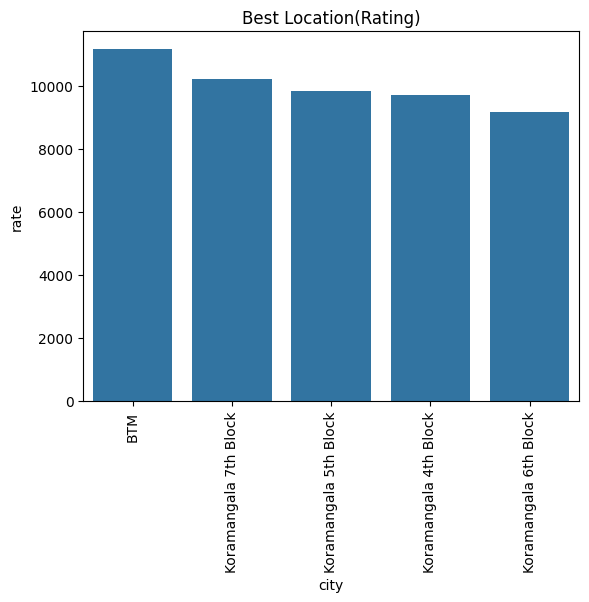

In [90]:
df = data[['city','rate']]
df = df.groupby('city')['rate'].sum()
df = df.to_frame()
df = df.sort_values('rate',ascending=False)
sns.barplot(x=df.index[:5],y=df['rate'][:5])
plt.xticks(rotation=90)
plt.title('Best Location(Rating)')
plt.show()

In [91]:
df = data['rest_type'].value_counts()[:5]
df = df.to_frame()

In [92]:
df

,count
rest_type,
Quick Bites,19321
Casual Dining,10309
Cafe,3727
Delivery,2600
Dessert Parlor,2247


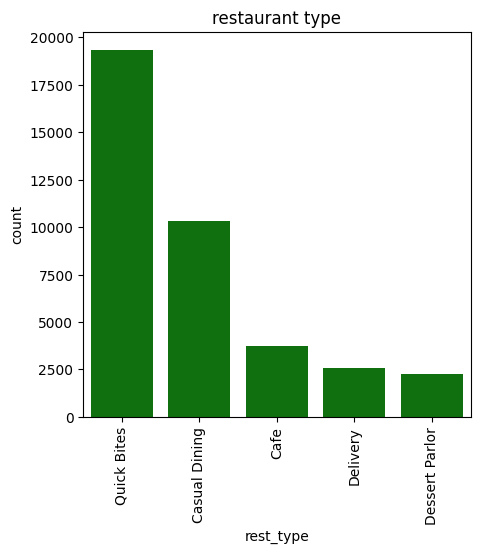

In [93]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.index,y=df['count'],color = 'green')
plt.xticks(rotation=90)
plt.title('restaurant type')
plt.show()

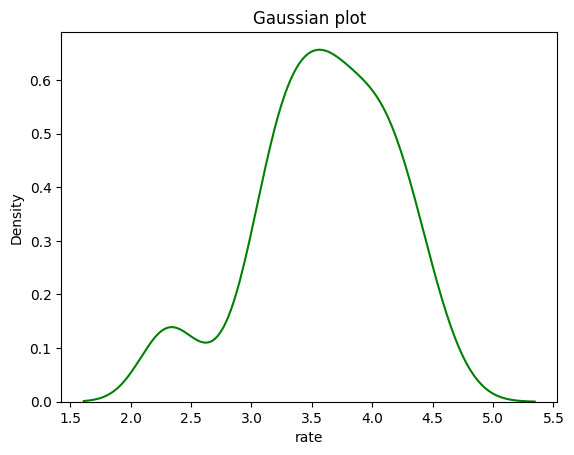

In [94]:
c= data.groupby('rest_type')['rate'].mean()
sns.kdeplot(c,color='green')
plt.title('Gaussian plot')
plt.show()

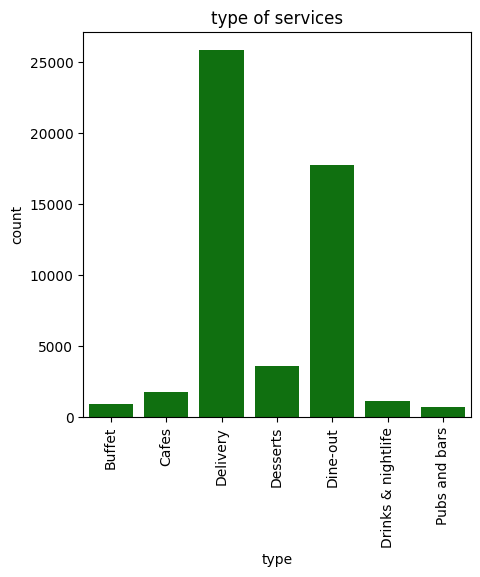

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['type'],color='green')
plt.title('type of services')
plt.xticks(rotation=90)
plt.show()

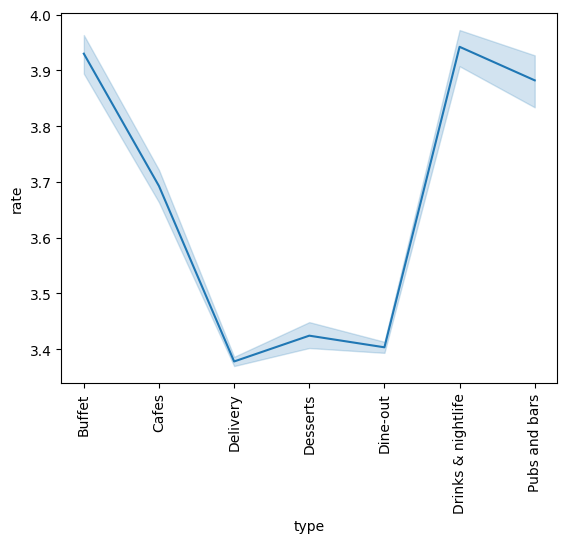

In [96]:
sns.lineplot(x='type',y='rate',data = data)
plt.xticks(rotation=90)
plt.show()


In [97]:
res = data.groupby('name')['approx_cost_for_two'].mean()
res = res.to_frame()[:10]
res

,approx_cost_for_two
name,
#FeelTheROLL,200.0
#L-81 Cafe,400.0
#Vibes Restro,700.0
#refuel,400.0
'Brahmins' Thatte Idli,100.0
1 Fahreheit,200.0
1000 B.C,300.0
100C,450.0
11 to 11 Express Biriyanis,300.0


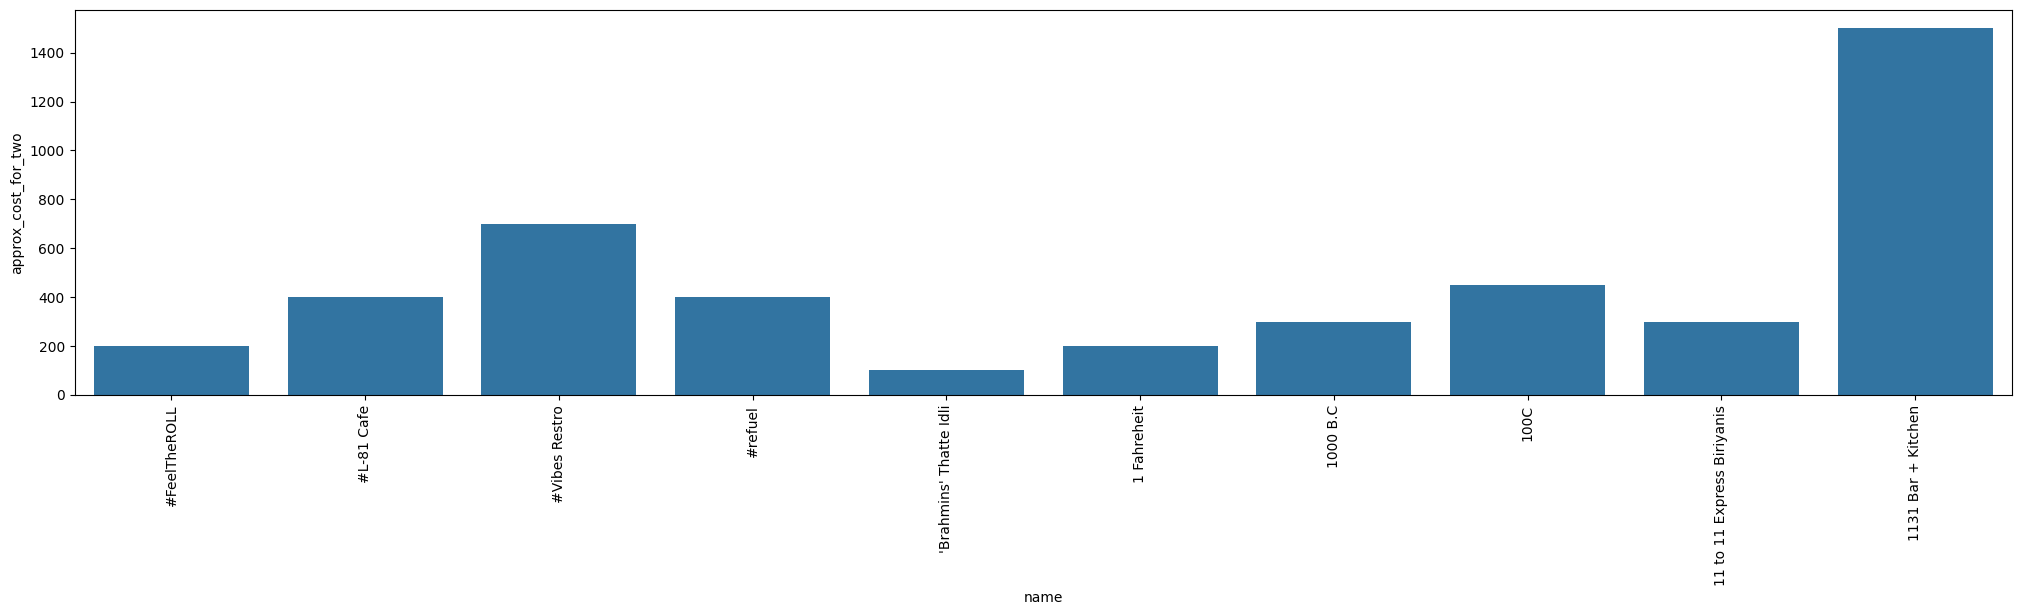

In [98]:
plt.figure(figsize=(25,5))
sns.barplot(y='approx_cost_for_two',x=res.index,data=res)
plt.xticks(rotation=90)
plt.show()

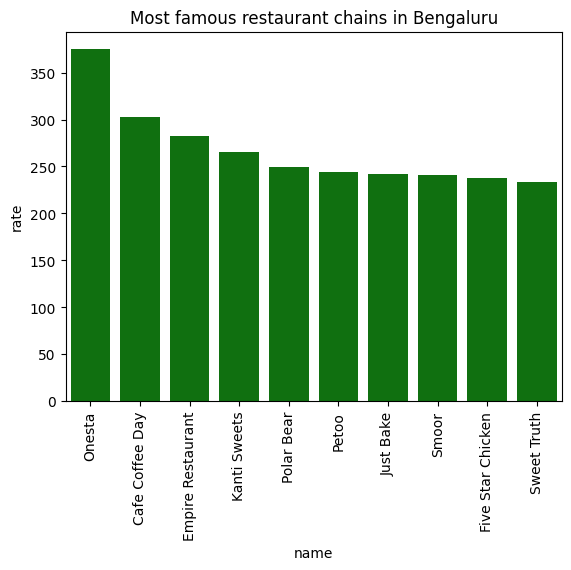

In [99]:
df = data.groupby('name')['rate'].sum().sort_values(ascending=False)
df=df.to_frame()[:10]
sns.barplot(x=df.index,y='rate',data=df,color='green')
plt.xticks(rotation=90)
plt.title('Most famous restaurant chains in Bengaluru')
plt.show()